## Introducción

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.
Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

A continuación se realizará la limpieza de datos, cambios de tipos de datos, analisis de información utilizando gráficos de barra, caja, de dispersión y de torta, con los cuales se podrá determinar que plataformas son las más vendidas, los generos más vendidos, las ventas totales, los analisis por región y como influyen las calificaciones de los usuarios y críticos en las ventas y su dependencia.

También se comprobaran hipótesis aplicando el test correspondiente y el calculo de varianza.



## Contenido

1- Carga de librerias

2- Procesamiento de datos

3- Analsis de datos

4- Creación de perfil de usuarios por región

5- Pruebas de hipótesis

6- Conclusiones generales



Paso 1 Carga de librerias

In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
try:
    video_games= pd.read_csv("games.csv")
except:
    video_games= pd.read_csv('/datasets/games.csv')

In [3]:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
video_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Paso 2 Procesamiento de datos

Reemplazo de nombres de columnas a minusculas

In [5]:
video_games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
video_games.rename(columns=str.lower, inplace=True)

In [7]:
video_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
#Revisando si hay filas duplicadas dentro del dataframe
video_games.duplicated().sum()

0

Convertir columnas a los datos correspondientes. 
La columna user_score está como object será cambiada a números de coma flotante (float), para este caso previamente se deberan eliminar o imputar los valores faltantes, igualmente la de critic_score

In [10]:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
video_games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

8578 datos faltantes es un valor de aproximadamente el 50% del total de datos dentro del DF, no podemos eliminarlos, como hay datos faltantes en las columnas que se necasitan para los analisis, estos no serán imputados, se trabajará el dataframe así como está. 

En las columnas de *name*, *year_of_release*, y *genre* se eliminarán las filas con valores faltantes ya que representan un muy bajo numero en compración de el numero de datos que hay registrado en el dataframe. 

En la columna *user_score* se cambiarán los datos de "tbd" por valores NaN.

Se realizarán los cambios de tipo de dato en las columnas que lo requieran. 

La columna rating se reemplazarán los NaN por unknown

Se trazarán gráficas de barra para determinar cuales son las plataformas más vendidas en mercado y de dispersión para observar como influyen las calificaciones sobre las ventas y que valor de correspondecia representan.

Tambén se realizara una comparación de los usuarios de por región que nos indicarán como son las ventas, platafomas más vendidas y cuales son los rating más populares entre jugadores.

In [12]:
video_games.loc[video_games["user_score"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
video_games.loc[video_games.loc[:,"user_score"]=="tbd"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [14]:
#Reemplazando tbd por NaN
video_games["user_score"]=video_games["user_score"].replace({"tbd":np.nan})

In [15]:
#Confirmando el cambio realizado
video_games.loc[video_games.loc[:,"user_score"]=="tbd"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [16]:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [17]:
#Eliminando los valores perdidos en las columnas de name, year_of_release, y genre
video_games.dropna(subset=['name', 'year_of_release', "genre"], inplace=True)

In [18]:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [19]:
video_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Calculo de las ventas totales (la suma de las ventas en todas las regiones) para cada juego.

In [20]:
video_games["total_sales"]=video_games["na_sales"]+video_games["eu_sales"]+video_games["jp_sales"]+video_games["other_sales"]
video_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [21]:
#Cambiando los tipos de datos contenidos en la columna year_of_release
video_games['year_of_release'] = video_games["year_of_release"].astype('int')

In [22]:
#Cambiando los tipos de dato contenidos en la columna user_score
video_games['user_score'] = video_games["user_score"].astype('float')

In [23]:
#Reemplazando los NaN por la palabra "unknown"
video_games["rating"]=video_games["rating"].fillna("unknown")

In [24]:
video_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Paso 3. Analisis de los datos

Revisando el número de lanzamientos por año

In [25]:
video_games_release_by_years=video_games.pivot_table(index="year_of_release", values="name", aggfunc="count")
video_games_release_by_years

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<AxesSubplot:xlabel='year_of_release'>

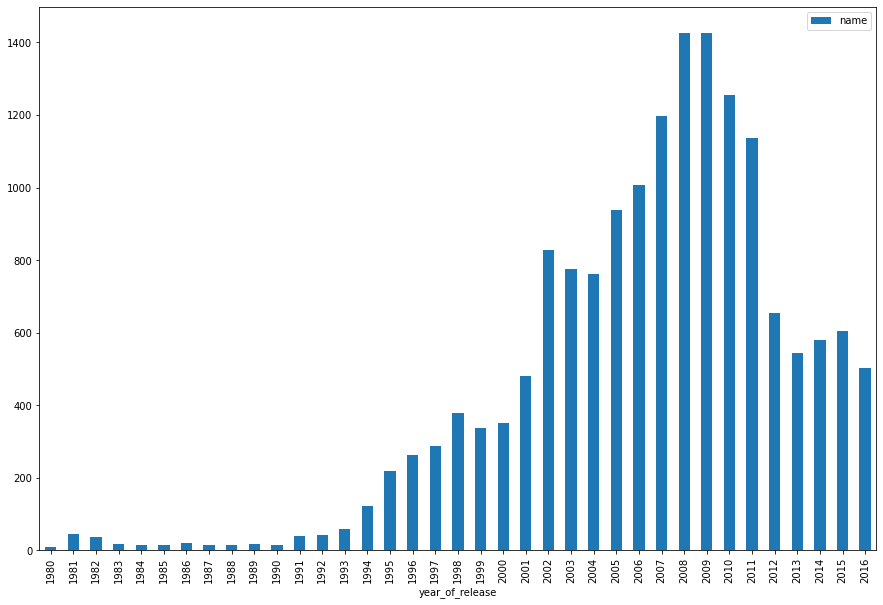

In [26]:
video_games_release_by_years.plot(y="name", figsize=(15,10), kind="bar")

Esa distribución de lanzamientos de juegos por año puede deberse al bajo numero de consolas en los primeros años, después en la decada del 2000 con el surgimiento de varias compañias con sus propios equipos de entretenimiento se ve un aumento en el numero de lanzamientos y después en la pasada decada se observa una disminución ya que hay tres empresas que dominan el mercado, Sony, Microsoft y Nintendo. Tomemos una muestra para comprobar lo anteriormente dicho, se puede notar que todos los lanzamientos en el año 1980 fueron para una misma consola.

In [27]:
sales_pivot=video_games.pivot_table(index="platform", columns="year_of_release", values="total_sales", aggfunc="sum")

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

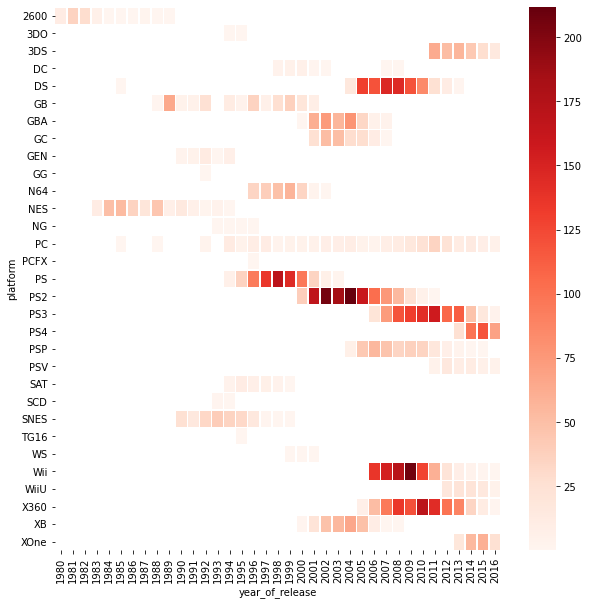

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(sales_pivot, cmap="Reds", linewidth=0.5)

En el gráfico de calor se puede observar por años como varian las ventas por plataformas(mientras más oscuro mayor venta y viceversa).

Para los últimos años las plataformas con más ventas son el PS4 y el X-box One

In [29]:
video_games.loc[video_games.loc[:,"year_of_release"]==1980.0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
262,Asteroids,2600,1980,Shooter,4.00,0.26,0.0,0.05,NaN,NaN,unknown,4.31
546,Missile Command,2600,1980,Shooter,2.56,0.17,0.0,0.03,NaN,NaN,unknown,2.76
1764,Kaboom!,2600,1980,Misc,1.07,0.07,0.0,0.01,NaN,NaN,unknown,1.15
1968,Defender,2600,1980,Misc,0.99,0.05,0.0,0.01,NaN,NaN,unknown,1.05
2650,Boxing,2600,1980,Fighting,0.72,0.04,0.0,0.01,NaN,NaN,unknown,0.77
4019,Ice Hockey,2600,1980,Sports,0.46,0.03,0.0,0.01,NaN,NaN,unknown,0.50
5360,Freeway,2600,1980,Action,0.32,0.02,0.0,0.00,NaN,NaN,unknown,0.34
6300,Bridge,2600,1980,Misc,0.25,0.02,0.0,0.00,NaN,NaN,unknown,0.27
6875,Checkers,2600,1980,Misc,0.22,0.01,0.0,0.00,NaN,NaN,unknown,0.23


A continuación se determianrá que plataformas son las más vendidas y el tiempo de vida una plataforma de video juegos y en cuanto tiempo sale una plataforma nueva al mercado

In [30]:
sales_platform= video_games.groupby(["platform"])["total_sales"].sum()
sales_platform.sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

<AxesSubplot:title={'center':'Total Sales per platform'}, ylabel='platform'>

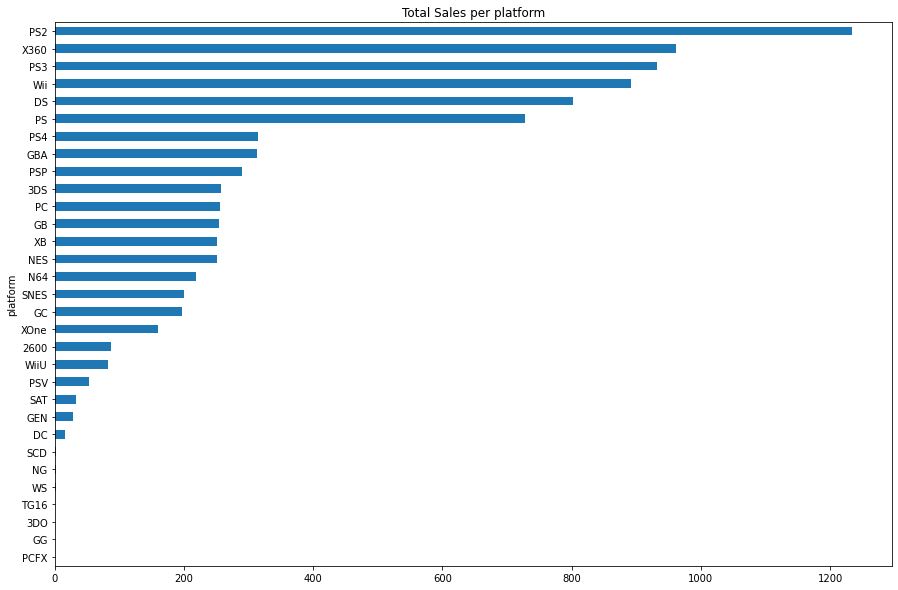

In [31]:
sales_platform.sort_values(ascending=True).plot(kind="barh", y="total_sales", figsize=(15,10), title="Total Sales per platform")

Las cinco primeras consolas en ventas son  PS2, X-Box 360, PS3, Wii, y DS.

Ventas por año de las cinco principales plataformas 

<AxesSubplot:title={'center':'Sales per year PS2'}, xlabel='year_of_release'>

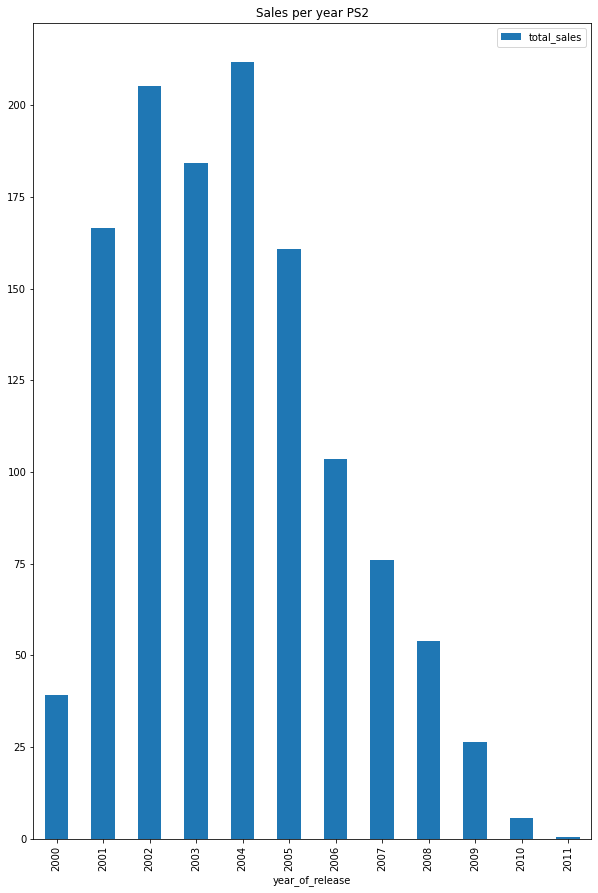

In [32]:
sales_ent_syst_ps2=video_games.pivot_table(index=["platform", "year_of_release"], values="total_sales", aggfunc="sum").reset_index()
sales_ent_syst_ps2.query('platform=="PS2"').plot(kind="bar", y="total_sales", x="year_of_release", title="Sales per year PS2", figsize=(10,15))


<AxesSubplot:title={'center':'Sales per year X-Box 360'}, xlabel='year_of_release'>

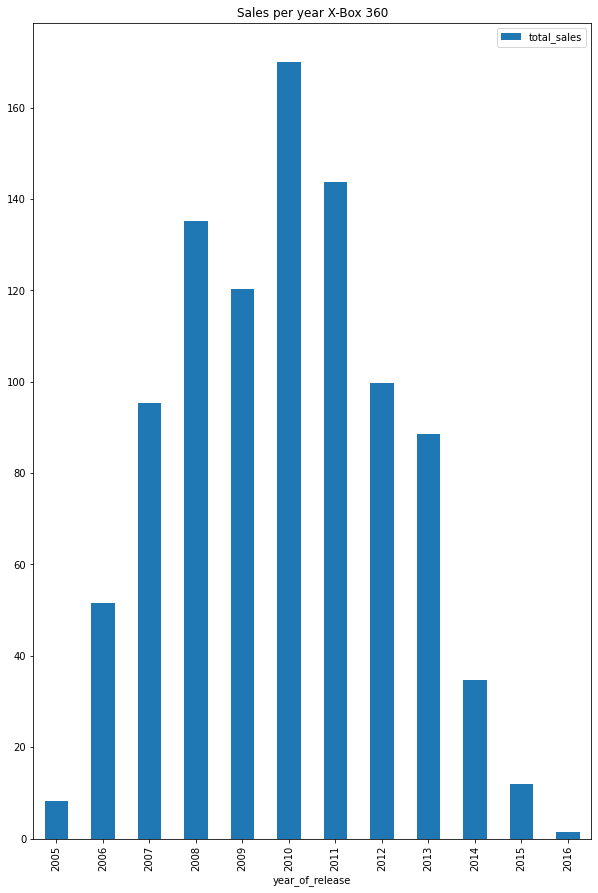

In [33]:
sales_ent_syst_x360=video_games.pivot_table(index=["platform", "year_of_release"], values="total_sales", aggfunc="sum").reset_index()
sales_ent_syst_x360.query('platform=="X360"').plot(kind="bar", y="total_sales", x="year_of_release", title="Sales per year X-Box 360", figsize=(10,15))

<AxesSubplot:title={'center':'Sales per year Wii'}, xlabel='year_of_release'>

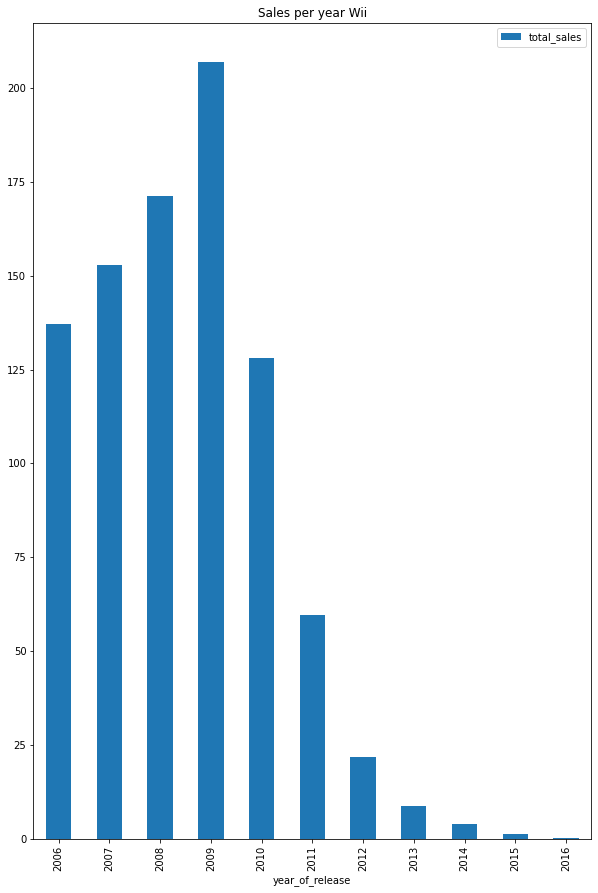

In [34]:
sales_ent_syst_wii=video_games.pivot_table(index=["platform", "year_of_release"], values="total_sales", aggfunc="sum").reset_index()
sales_ent_syst_wii.query('platform=="Wii"').plot(kind="bar", y="total_sales", x="year_of_release", title="Sales per year Wii", figsize=(10,15))

<AxesSubplot:title={'center':'Sales per year PS3'}, xlabel='year_of_release'>

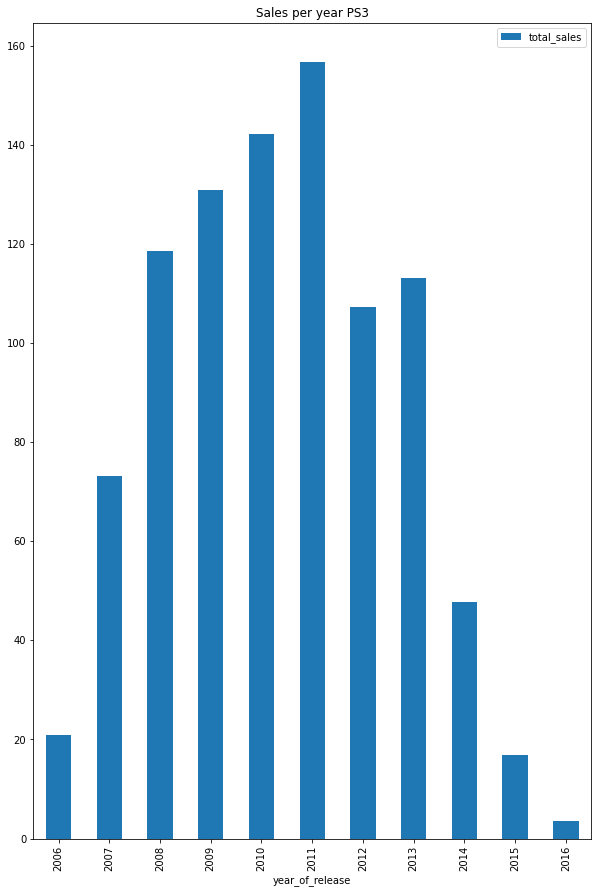

In [35]:
sales_ent_syst_ps3=video_games.pivot_table(index=["platform", "year_of_release"], values="total_sales", aggfunc="sum").reset_index()
sales_ent_syst_ps3.query('platform=="PS3"').plot(kind="bar", y="total_sales", x="year_of_release", title="Sales per year PS3", figsize=(10,15))

<AxesSubplot:title={'center':'Sales per year DS'}, xlabel='year_of_release'>

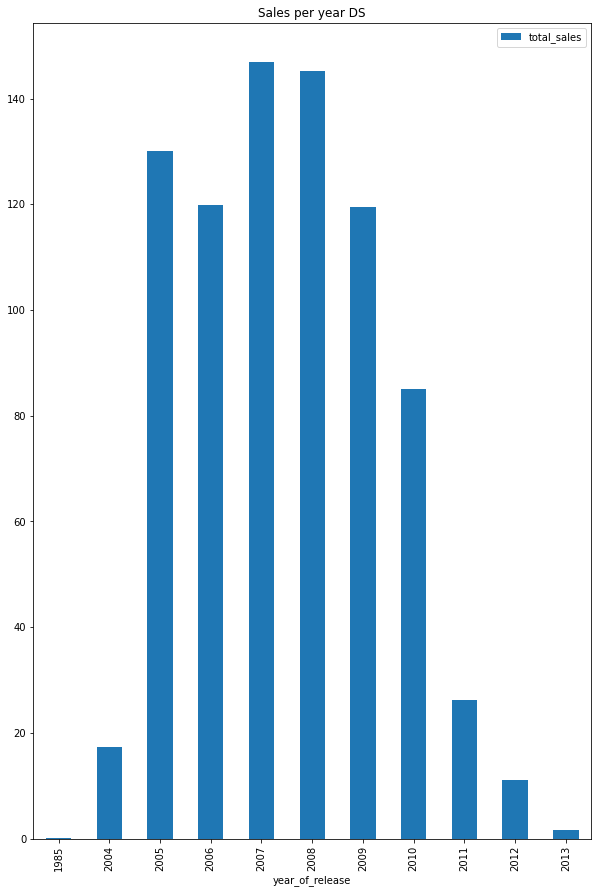

In [36]:
sales_ent_syst_ds=video_games.pivot_table(index=["platform", "year_of_release"], values="total_sales", aggfunc="sum").reset_index()
sales_ent_syst_ds.query('platform=="DS"').plot(kind="bar", y="total_sales", x="year_of_release", title="Sales per year DS", figsize=(10,15))

Como se puede ver en los gráficos las consolas tienen un tiempo de popularidad o tiempo de vida de 10 a 11 años. Las nuevas consolas tienden a aparecer aproximadamente cada 6 años.

Basado en la información anterior, para poder realizar una proyección para el año 2017, tendremos que tomar los datos a partir del 2012, para tener 4 años de referencia. Así se podrán observar que plataformas tienen mayor demanda en los últimos años 

In [119]:
#Tomado un slice del DataFrame original a partir del año 2014
games_beyond_2014=video_games.query('year_of_release>2013')
games_beyond_2014

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [120]:
#Se mostraran las ventas por consolas
sales_beyond_2014=games_beyond_2014.groupby(["platform"])["total_sales"].sum()
sales_beyond_2014.sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

* Se tomarán las dos primeras consolas para realizar la proyección del 2017, se puede observar que el PS4 tiene mayor venta, seguido por la X-box One, esto coincide con lo reflejado en el heatmap.

* Las plataformas que van desapareciendo serian la PSV, Wii y la PSP.

In [121]:
#Filtro para trabajar solo con las consolas principales(falta corregir el filtro segun las ventas)
filtered_platform_2014= games_beyond_2014.query('platform!="3DS" and platform!="PSP" and platform!="PC" and platform!="PS2" and platform!="WiiU" and platform!="PSV" and platform!="GBA" and platform!="XB" and platform!="GC" and platform!="DC" and platform!="Wii" and platform!="PS3" and platform!="X360" and platform!="WiiU"')
filtered_platform_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 31 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             604 non-null    object 
 1   platform         604 non-null    object 
 2   year_of_release  604 non-null    int64  
 3   genre            604 non-null    object 
 4   na_sales         604 non-null    float64
 5   eu_sales         604 non-null    float64
 6   jp_sales         604 non-null    float64
 7   other_sales      604 non-null    float64
 8   critic_score     392 non-null    float64
 9   user_score       407 non-null    float64
 10  rating           604 non-null    object 
 11  total_sales      604 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 61.3+ KB


<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

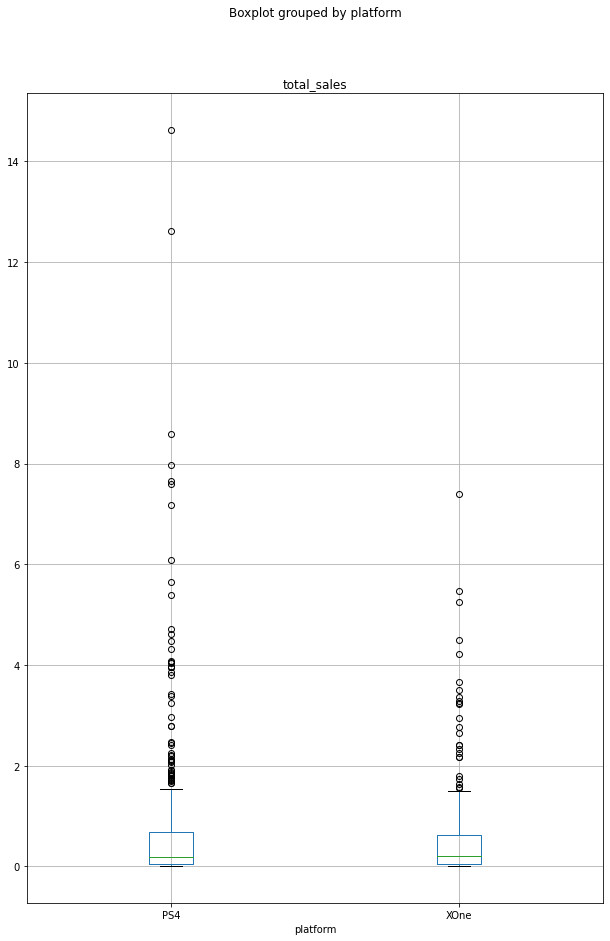

In [122]:
#Creando graficos de caja para observar las difrencias de ventas
filtered_platform_2014.boxplot(column="total_sales", by="platform", figsize=(10,15))

* En los graficos de caja se puede observar que la media es muy similar para ambas plataformas, 


* La consola con el valor atipico más alto es la PS4 por arriba de los 14 millones de dólares en ventas.

PS4

<AxesSubplot:title={'center':'PS4 total sales vs critic scores'}, xlabel='critic_score', ylabel='total_sales'>

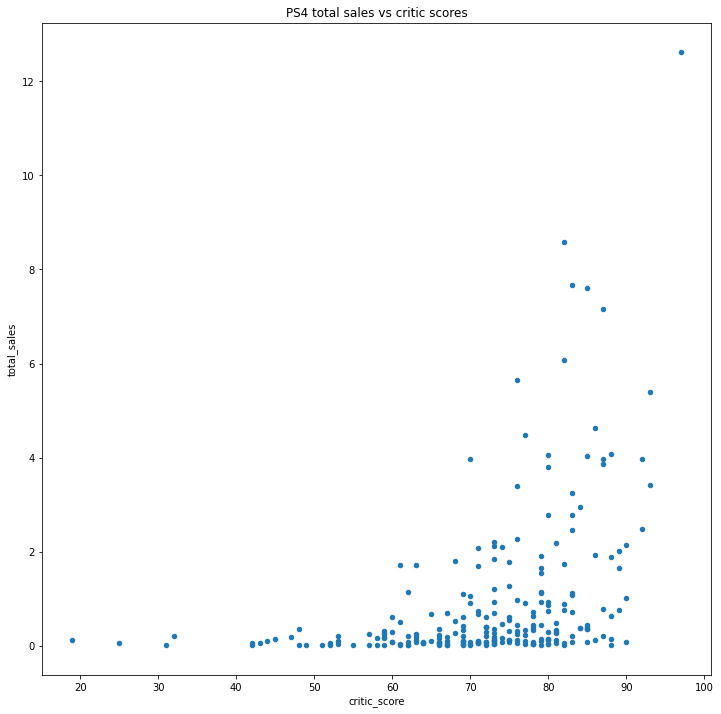

In [123]:
sales_critics_user_ps4= filtered_platform_2014.query('platform=="PS4"')
sales_critics_user_ps4.plot(x="critic_score", y="total_sales", kind="scatter", title="PS4 total sales vs critic scores", figsize=(12,12))


<AxesSubplot:title={'center':'PS4 total sales vs user scores'}, xlabel='user_score', ylabel='total_sales'>

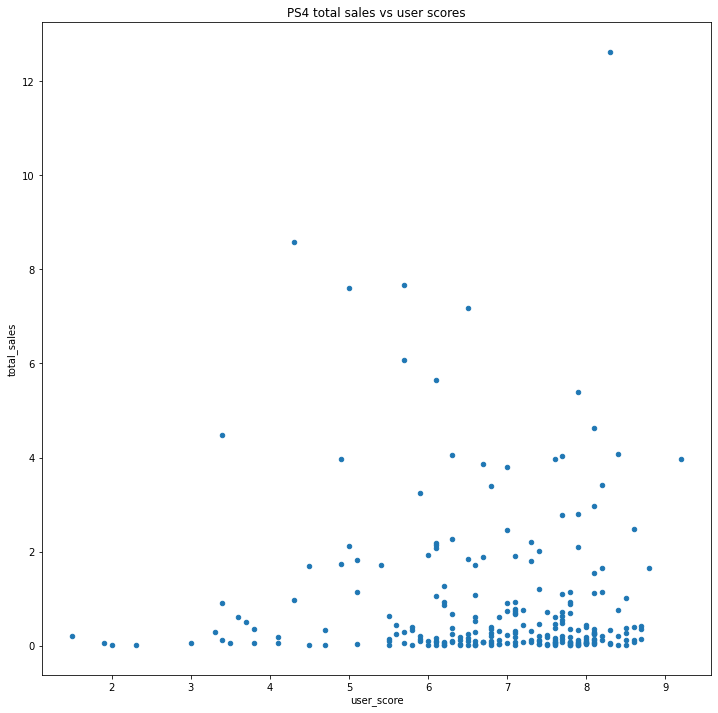

In [124]:
sales_critics_user_ps4= filtered_platform_2014.query('platform=="PS4"')
sales_critics_user_ps4.plot(x="user_score", y="total_sales", kind="scatter", title="PS4 total sales vs user scores", figsize=(12,12))

In [125]:
#Ahora se calculrá el coeficiente de correlación para conocer el nivel de relación que tienen
cor_sales_critic_ps4=sales_critics_user_ps4["total_sales"].corr(sales_critics_user_ps4["critic_score"])
print(f"Coeficiente de correlación total sales y critic score:{cor_sales_critic_ps4}")
print()
cor_sales_user_ps4=sales_critics_user_ps4["total_sales"].corr(sales_critics_user_ps4["user_score"])
print(f"Coeficiente de correlación total sales y user score:{cor_sales_user_ps4}")

Coeficiente de correlación total sales y critic score:0.40266141068104083

Coeficiente de correlación total sales y user score:-0.040131589472697356


* El coeficiente de correlación para total sales y la calificación de los críticos tiene una dependencia baja, positiva, es decir ambas crecen.
* El coeficiente de correlación para total sales y la calificación de los usuarios tiene una dependencia muy baja pero negativa, en el gráfico se observa que mientras aumentas las calificaciones disminuyen las ventas.

Wii

In [ ]:
#sales_critics_user_wii= filtered_platform_2007.query('platform=="Wii"')
#sales_critics_user_wii.plot(x="critic_score", y="total_sales", kind="scatter", title="Wii total sales vs critic scores", figsize=(12,12))


In [ ]:
#sales_critics_user_wii= filtered_platform_2007.query('platform=="Wii"')
#sales_critics_user_wii.plot(x="user_score", y="total_sales", kind="scatter", title="Wii total sales vs user scores", figsize=(12,12))

In [ ]:
#Ahora se calculrá el coeficiente de correlación para conocer el nivel de relación que tienen
#cor_sales_critic_wii=sales_critics_user_wii["total_sales"].corr(sales_critics_user_wii["critic_score"])
#print(f"Coeficiente de correlación total sales y critic score:{cor_sales_critic_wii}")
#print()
#cor_sales_user_wii=sales_critics_user_wii["total_sales"].corr(sales_critics_user_wii["user_score"])
#print(f"Coeficiente de correlación total sales y user score:{cor_sales_user_wii}")

* El coeficiente de correlación de total sales versus la calificación de críticos y usuarios es positiva, es decir, a medida que aumentan las calificaciones también las ventas.
* En términos de dependencia ambos coeficientes tienen un bajo nivel de dependencia, el de la calificación de los críticos es un poco superior a la de los usuarios. 

X-Box One

<AxesSubplot:title={'center':'X-box One total sales vs critic scores'}, xlabel='critic_score', ylabel='total_sales'>

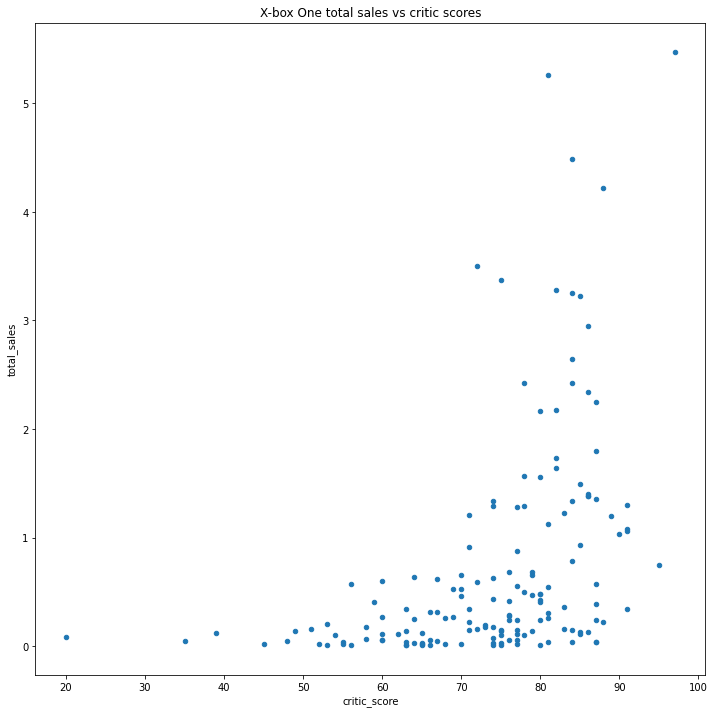

In [126]:
sales_critics_user_xone= filtered_platform_2014.query('platform=="XOne"')
sales_critics_user_xone.plot(x="critic_score", y="total_sales", kind="scatter", title="X-box One total sales vs critic scores", figsize=(12,12))

<AxesSubplot:title={'center':'X-box One total sales vs user scores'}, xlabel='user_score', ylabel='total_sales'>

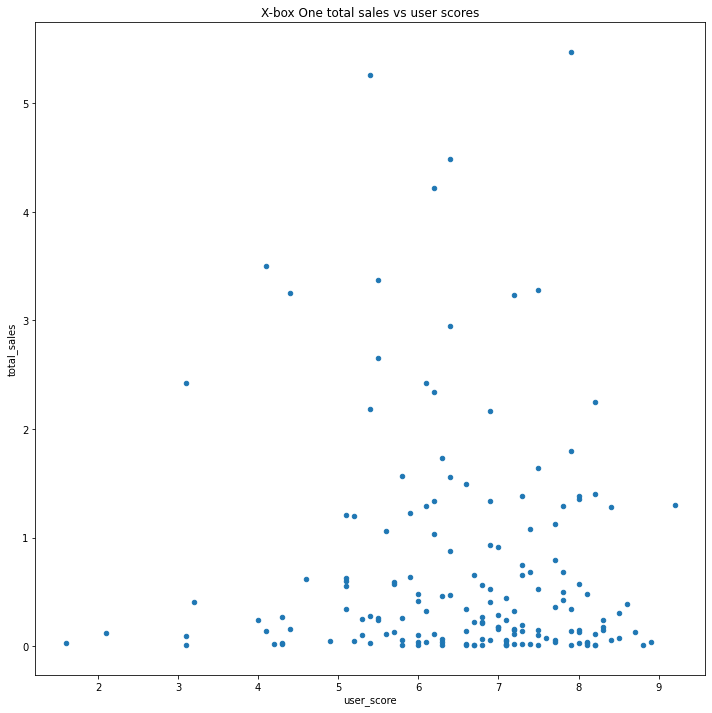

In [127]:
sales_critics_user_xone= filtered_platform_2014.query('platform=="XOne"')
sales_critics_user_xone.plot(x="user_score", y="total_sales", kind="scatter", title="X-box One total sales vs user scores", figsize=(12,12))

In [128]:
#Ahora se calculrá el coeficiente de correlación para conocer el nivel de relación que tienen
cor_sales_critic_xone=sales_critics_user_xone["total_sales"].corr(sales_critics_user_xone["critic_score"])
print(f"Coeficiente de correlación total sales y critic score:{cor_sales_critic_xone}")
print()
cor_sales_user_xone=sales_critics_user_xone["total_sales"].corr(sales_critics_user_xone["user_score"])
print(f"Coeficiente de correlación total sales y user score:{cor_sales_user_xone}")

Coeficiente de correlación total sales y critic score:0.42867694370333226

Coeficiente de correlación total sales y user score:-0.0703839280647581


* El coeficiente de correlación es positivo en el caso de las ventas totales vs la calificación de los críticos, es decir, las ventas aumentas al igual que las calificaciones.

* El coeficiente de correlación en el caso de las ventas vs la calificación de los usuarios es negativo, las calificaciones aumentaron pero las ventas disminuyeron
* El nivel de dependencia es bajo en ambos casos, siendo el de total sales vs critic score es mayor que el de total sales vs user scores.

In [73]:
#Este filtro es solamente para saber que tipo de juegos son los Misc, son aquellos en los que se utilizan los perifericos 
#de movimiento, es decir, move (para Play Station) o kinetcis (para X-Box)
video_games.loc[video_games.loc[:,"genre"]=="Misc"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,4.74,9.20,4.16,2.04,77.0,7.9,E,20.14
61,Just Dance 3,Wii,2011,Misc,5.95,3.11,0.00,1.06,74.0,7.8,E10+,10.12
68,Just Dance 2,Wii,2010,Misc,5.80,2.85,0.01,0.78,74.0,7.3,E10+,9.44
...,...,...,...,...,...,...,...,...,...,...,...,...
16621,DJ Max Technika Tune,PSV,2012,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16626,The Ultimate Battle of the Sexes,Wii,2010,Misc,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16632,Style Book: Cinnamoroll,DS,2006,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16636,Deal or No Deal,PC,2006,Misc,0.00,0.01,0.00,0.00,NaN,7.5,E,0.01


Generos rentables de los a partir del 2014

In [129]:
game_genres_beyond2014= filtered_platform_2014['genre'].value_counts().sort_values(ascending=False)
game_genres_beyond2014

Action          223
Sports           76
Shooter          74
Role-Playing     65
Adventure        42
Racing           36
Misc             36
Fighting         22
Platform         13
Simulation        9
Strategy          7
Puzzle            1
Name: genre, dtype: int64

<AxesSubplot:title={'center':'Game genres since 2014'}>

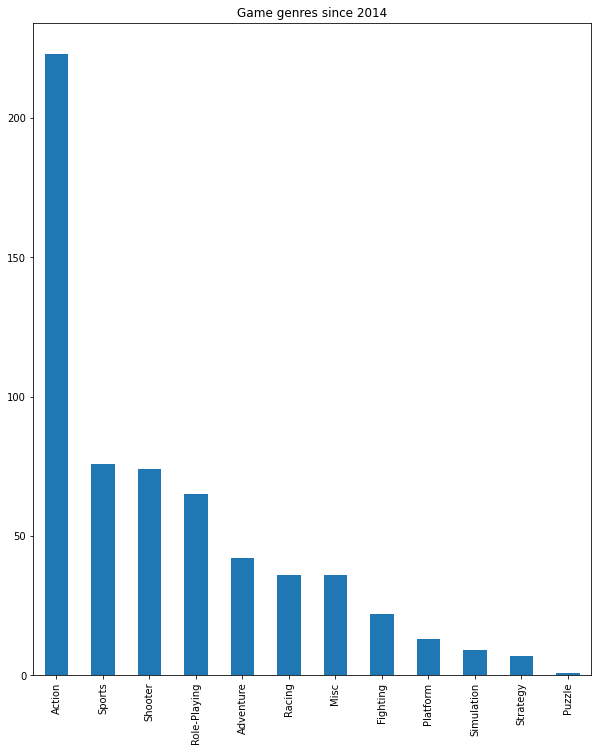

In [130]:
game_genres_beyond2014.plot(kind="bar", title="Game genres since 2014", figsize=(10,12))

Se puede observar que los juegos de acción, deportes y disparos son las tres categorias con mayor número de juegos que salen al mercado. Las tres categorias que presentan menores ventas son las de simulación, estrategia y rompecabezas.

<AxesSubplot:title={'center':'Game sales per genre since 2014'}, xlabel='genre'>

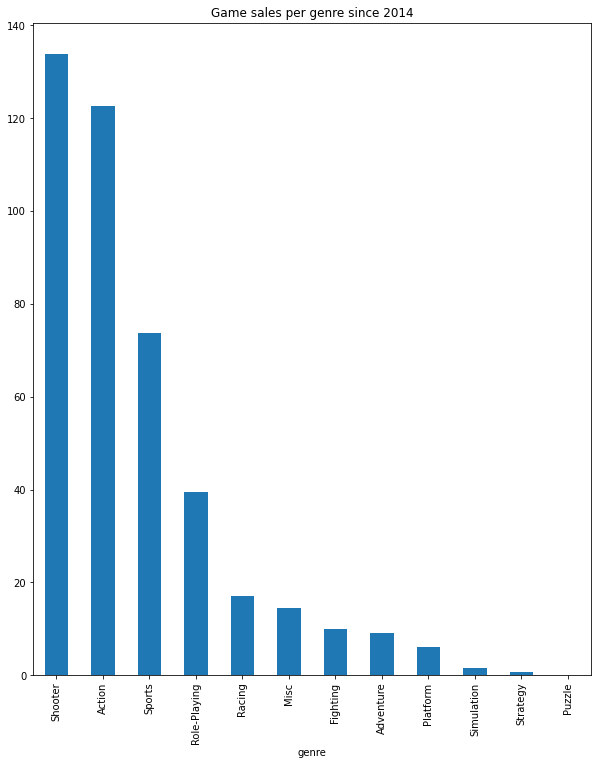

In [133]:
sales_filtered_platform_2014=filtered_platform_2014.groupby("genre")["total_sales"].sum().sort_values(ascending=False)
sales_filtered_platform_2014.plot(kind="bar", title="Game sales per genre since 2014", figsize=(10,12))

Las ventas por genero de juego arroja que los juegos de disparos, acción y deportes son los tres generos más vendidos.

A continuación se muestra el top 10 general de los videojuegos más populares desde el 2014

In [164]:
favorite_games_2014=filtered_platform_2014.groupby("name")["total_sales"].sum().sort_values(ascending=False)
favorite_games_2014.head(10)

name
Call of Duty: Black Ops 3         22.02
Grand Theft Auto V                18.09
Call of Duty: Advanced Warfare    12.92
FIFA 16                           11.83
Star Wars Battlefront (2015)      11.64
Fallout 4                         11.39
FIFA 17                           10.25
Destiny                            9.01
FIFA 15                            8.26
Assassin's Creed: Unity            7.46
Name: total_sales, dtype: float64

Paso 4 Crear un perfil de usuario para cada región

Norte America

In [132]:
#Se crearan perfiles de ventas, rating y genero para cada una de las regiones NA= Norte America, EU= Europa y JP= Japón, desde 2007

na_profile_sales= games_beyond_2014.groupby(["platform"])["na_sales"].sum().sort_values(ascending=False)
na_profile_sales.head()

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

<AxesSubplot:title={'center':'NA platform sales since 2014'}, xlabel='platform'>

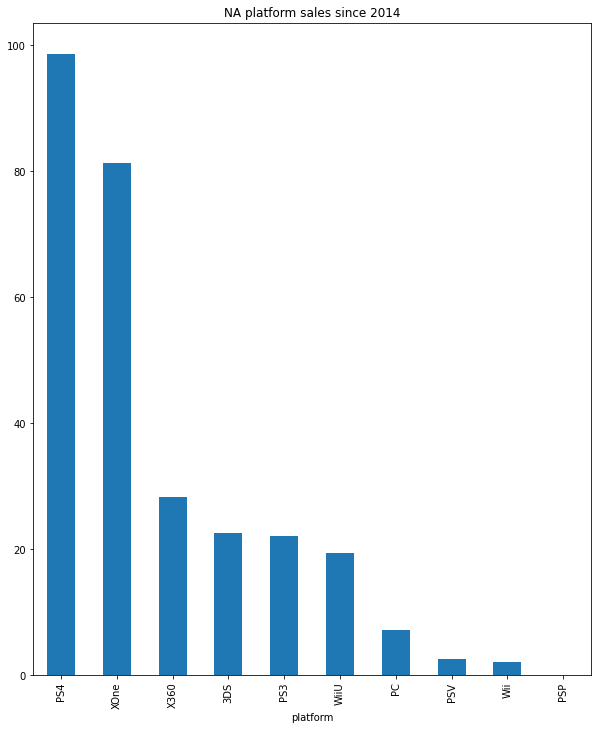

In [134]:
na_profile_sales.plot(kind="bar", figsize=(10,12), title="NA platform sales since 2014")

In [135]:
na_profile_rating= games_beyond_2014.groupby(["rating"])["na_sales"].sum().sort_values(ascending=False)
na_profile_rating

rating
M          96.42
unknown    64.72
E          50.74
T          38.95
E10+       33.23
Name: na_sales, dtype: float64

<AxesSubplot:title={'center':'NA rating since 2014'}, xlabel='rating'>

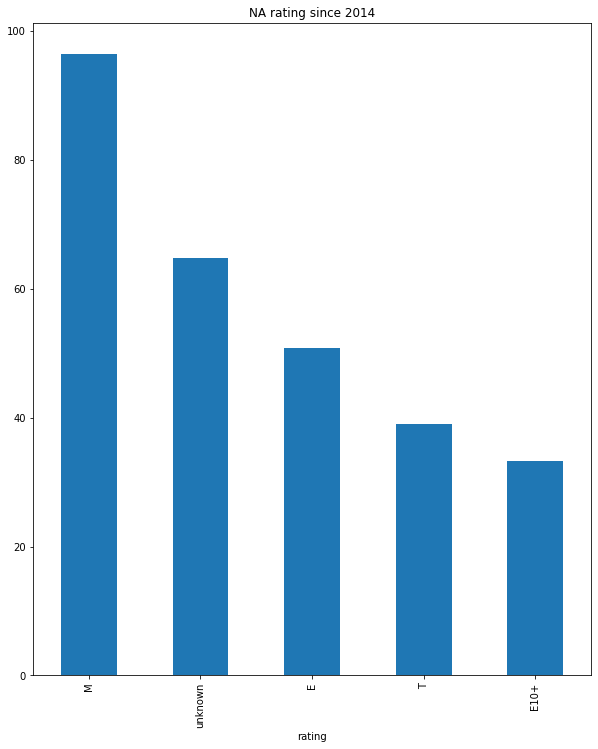

In [136]:
na_profile_rating.plot(kind="bar", figsize=(10,12), title="NA rating since 2014")

In [137]:
na_profile_genre= games_beyond_2014.groupby(["genre"])["na_sales"].sum().sort_values(ascending=False)
na_profile_genre

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Fighting        12.43
Racing           8.74
Platform         6.79
Adventure        5.64
Simulation       2.63
Strategy         0.98
Puzzle           0.65
Name: na_sales, dtype: float64

<AxesSubplot:title={'center':'NA genres since 2014'}, xlabel='genre'>

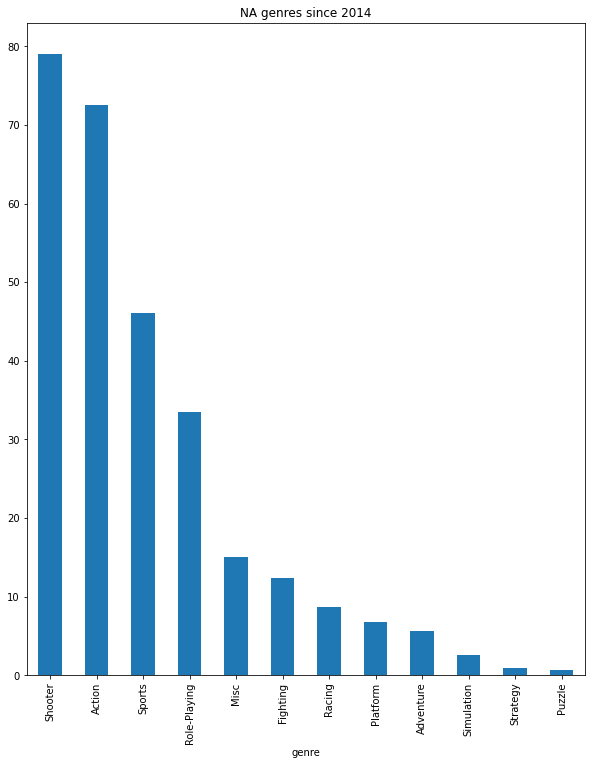

In [138]:
na_profile_genre.plot(kind="bar", figsize=(10,12), title="NA genres since 2014")

Perfil para Europa

In [139]:
eu_profile_sales= games_beyond_2014.groupby(["platform"])["eu_sales"].sum().sort_values(ascending=False)
eu_profile_sales.head()

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

<AxesSubplot:title={'center':'EU platform sales since 2014'}, xlabel='platform'>

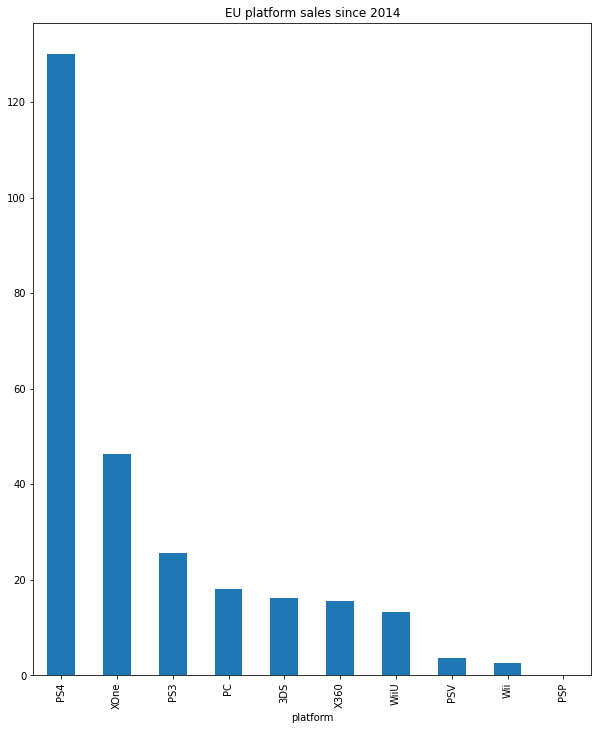

In [140]:
eu_profile_sales.plot(kind="bar", figsize=(10,12), title="EU platform sales since 2014")

In [141]:
eu_profile_rating= games_beyond_2014.groupby(["rating"])["eu_sales"].sum().sort_values(ascending=False)
eu_profile_rating

rating
M          93.44
unknown    58.95
E          58.06
T          34.07
E10+       26.16
Name: eu_sales, dtype: float64

<AxesSubplot:title={'center':'EU rating since 2014'}, xlabel='rating'>

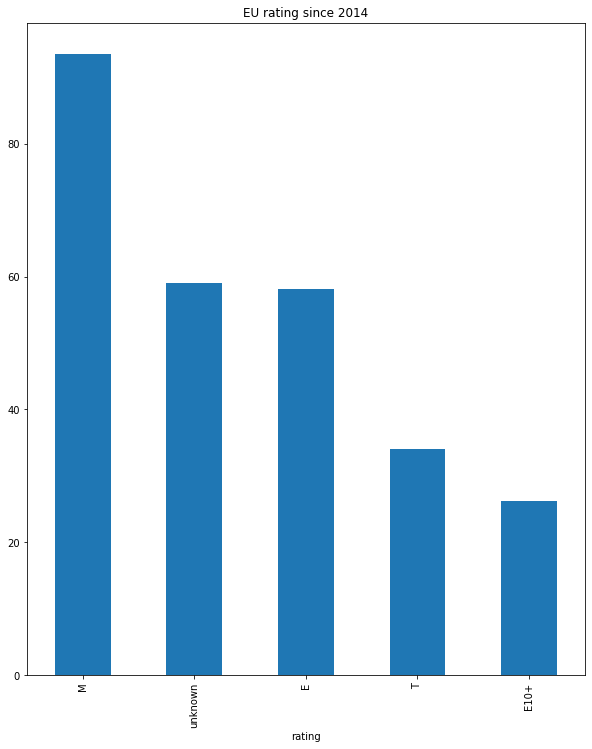

In [142]:
eu_profile_rating.plot(kind="bar", figsize=(10,12), title="EU rating since 2014")

In [143]:
eu_profile_genre= games_beyond_2014.groupby(["genre"])["eu_sales"].sum().sort_values(ascending=False)
eu_profile_genre.head()

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

<AxesSubplot:title={'center':'EU genres since 2014'}, xlabel='genre'>

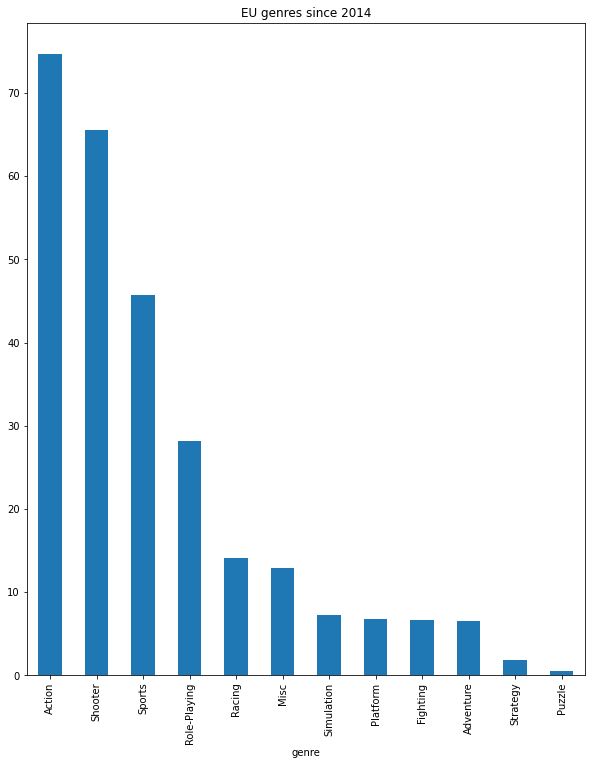

In [144]:
eu_profile_genre.plot(kind="bar", figsize=(10,12), title="EU genres since 2014")

Perfil para Japón 

In [145]:
jp_profile_sales= games_beyond_2014.groupby(["platform"])["jp_sales"].sum().sort_values(ascending=False)
jp_profile_sales.head()

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

<AxesSubplot:title={'center':'JP platform sales since 2014'}, xlabel='platform'>

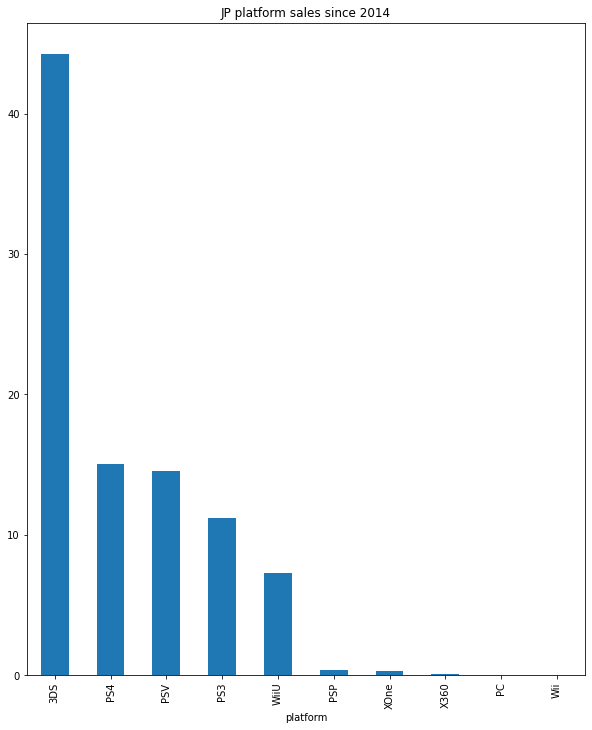

In [146]:
jp_profile_sales.plot(kind="bar", figsize=(10,12), title="JP platform sales since 2014")

In [147]:
jp_profile_rating= games_beyond_2014.groupby(["rating"])["jp_sales"].sum().sort_values(ascending=False)
jp_profile_rating.head()

rating
unknown    56.90
T          14.78
E           8.94
M           8.01
E10+        4.46
Name: jp_sales, dtype: float64

<AxesSubplot:title={'center':'EU rating since 2014'}, xlabel='rating'>

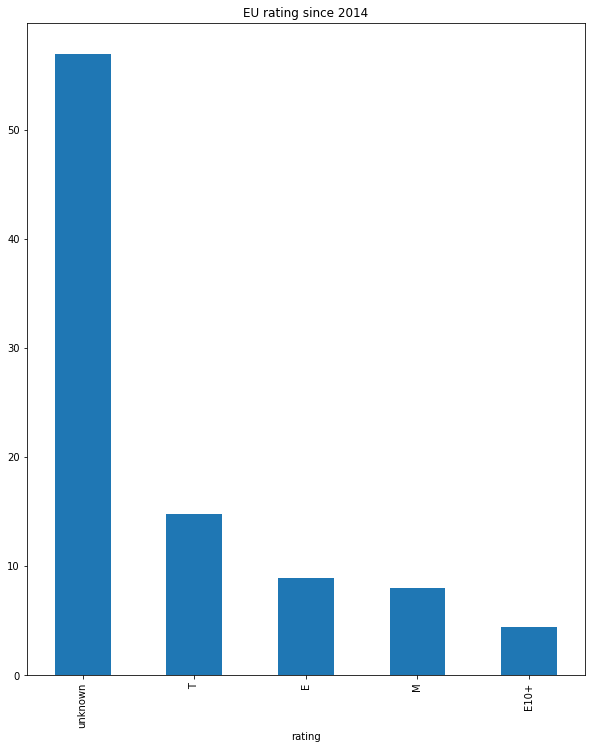

In [148]:
jp_profile_rating.plot(kind="bar", figsize=(10,12), title="EU rating since 2014")

In [149]:
jp_profile_genre= games_beyond_2014.groupby(["genre"])["jp_sales"].sum().sort_values(ascending=False)
jp_profile_genre.head()

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

<AxesSubplot:title={'center':'JP genres since 2014'}, xlabel='genre'>

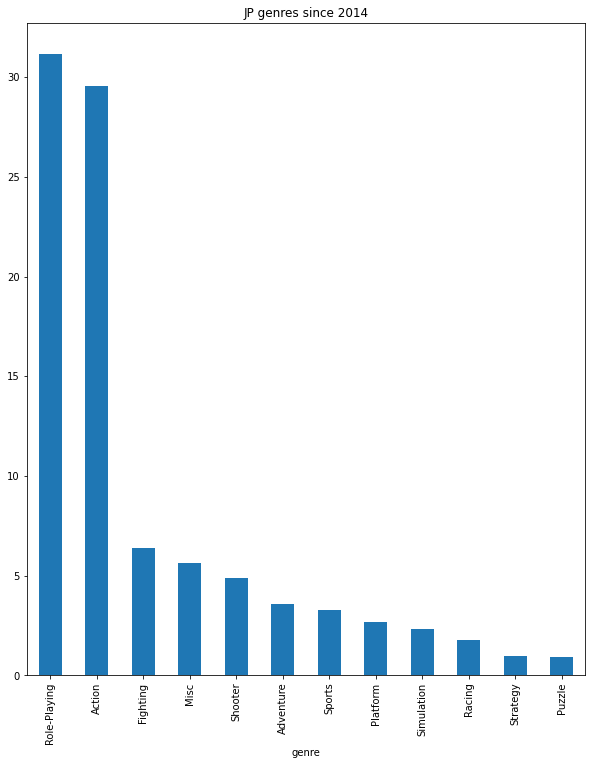

In [150]:
jp_profile_genre.plot(kind="bar", figsize=(10,12), title="JP genres since 2014")

* Para Europa y Norte America la venta de consolas es muy similar, para NA las dos primeras plataformas vendidas son: PS4, X-box One.

* Para los rating NA y EU son similares, M, unknown, E, T, E10+.

* Para el perfil JP las plataformas top son las asiaticas 3DS, PS4.

* Las prefencia de generos de video juegos son muy parecidas para NA y EU, las 4 primeras son shooter, action, sport, role-playing.

* Para JP los cinco primeros generos de video juego son: role-playing, action, fighting, y misc.

5 Pruebas de hipótesis

Se probará la siguiente hipótesis nula: 

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas

La hipótesis alternativa será: 

Las calificaciones promedio de los usuarios para  las platafomas Xbox One y PC son diferentes

Se realizaran dos segmentaciones uno para los usuarios de Xbox One y otra para los de PC

In [152]:
xone=games_beyond_2014.query('platform=="XOne"')
xone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 99 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             228 non-null    object 
 1   platform         228 non-null    object 
 2   year_of_release  228 non-null    int64  
 3   genre            228 non-null    object 
 4   na_sales         228 non-null    float64
 5   eu_sales         228 non-null    float64
 6   jp_sales         228 non-null    float64
 7   other_sales      228 non-null    float64
 8   critic_score     155 non-null    float64
 9   user_score       165 non-null    float64
 10  rating           228 non-null    object 
 11  total_sales      228 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 23.2+ KB


In [153]:
pc=games_beyond_2014.query('platform=="PC"')
pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 458 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             151 non-null    object 
 1   platform         151 non-null    object 
 2   year_of_release  151 non-null    int64  
 3   genre            151 non-null    object 
 4   na_sales         151 non-null    float64
 5   eu_sales         151 non-null    float64
 6   jp_sales         151 non-null    float64
 7   other_sales      151 non-null    float64
 8   critic_score     116 non-null    float64
 9   user_score       122 non-null    float64
 10  rating           151 non-null    object 
 11  total_sales      151 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 15.3+ KB


Para comprobar las hipótesis tomaremos en umbral de significación de 0.05 (alpha), se probará que las varianzas son diferentes para ambas muestras, se utilizará el test ttest_ind.

In [154]:
#calculo de las varianzas
np.var(xone["user_score"])


1.879546005509642

In [155]:
np.var(pc["user_score"])

2.8773743617307175

In [156]:
alpha = 0.05 #significación estadística

results =st.ttest_ind(xone["user_score"],pc["user_score"], equal_var=False, nan_policy="omit") 
print('p-value:',results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.11601398086668943
No rechazamos la hipótesis nula


**Se ha realizado la prueba de hipótesis y no se ha podido rechazar la hipótesis nula. Esto quiere decir que las calificaciones medias son iguales para ambas plataformas**

Ahora se probará la siguiente hipotesis

"Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes".

La hipótesis nula será:

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales

La hipótesis alternativa será:

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [157]:
#Primero se hará el slice con los juegos de acción
action_group=games_beyond_2014.query('genre=="Action"')
action_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619 entries, 42 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             619 non-null    object 
 1   platform         619 non-null    object 
 2   year_of_release  619 non-null    int64  
 3   genre            619 non-null    object 
 4   na_sales         619 non-null    float64
 5   eu_sales         619 non-null    float64
 6   jp_sales         619 non-null    float64
 7   other_sales      619 non-null    float64
 8   critic_score     231 non-null    float64
 9   user_score       297 non-null    float64
 10  rating           619 non-null    object 
 11  total_sales      619 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 62.9+ KB


In [158]:
#Ahora con los juegos de deportes
sport_group=games_beyond_2014.query('genre=="Sports"')
sport_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 77 to 16643
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             161 non-null    object 
 1   platform         161 non-null    object 
 2   year_of_release  161 non-null    int64  
 3   genre            161 non-null    object 
 4   na_sales         161 non-null    float64
 5   eu_sales         161 non-null    float64
 6   jp_sales         161 non-null    float64
 7   other_sales      161 non-null    float64
 8   critic_score     84 non-null     float64
 9   user_score       127 non-null    float64
 10  rating           161 non-null    object 
 11  total_sales      161 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 16.4+ KB


In [159]:
#Calculo de las varianzas para action_group
np.var(action_group["user_score"])

1.89208448117539

In [160]:
#Calculo de las varianzas para sport_group
np.var(sport_group["user_score"])

3.419837559675119

Se comprobó que las varianzas son diferentes para cada grupo, se utilizará el test de hipótesis ttest_ind().

Se utilizará un umbral de significación esatadística del 5%

In [161]:
alpha = 0.05 #significación estadística

results =st.ttest_ind(action_group["user_score"],sport_group["user_score"], equal_var=False, nan_policy="omit") 
print('p-value:',results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 1.182555038264477e-14
Rechazamos la hipótesis nula


**La hipótesis nula ha sido rechazada, por lo que en promedio las calificaciones para los usuarios y los criticos no son iguales.** 

## Conclusiones generales

* Para este proyecto no se completaron los datos faltantes en las columnas que poseian valores NaN; se realizaron los cambios de tipos de datos necesarios.

* Se determinó que la vida de una plataforma en el mercado es de 10 a 11 años y que cada seis años aparece una nueva plataforma.

* Para realizar la proyección del 2017, se tomaron los datos a partir del 2014, y se determinó que las plataformas con más ventas son la PS4 y la X-box One para este periodo de tiempo.

* En los gráficos de dispersión se observa que en los casos estudiados el coeficiente de correlación de las calificaciones de los criticos fue siempre mayor que la de los usuarios. También se observó que los niveles de dependencia fueron de medios a bajos.

* Los generos de  video juegos más vendidos son: action, sport, shooter y role-playing y adventure.

* Las ventas de plataforma, rating y genero son similares en EU y NA, en la región JP las ventas de plataformas son todas asiaticas, el principal genero de venta para esta región es el de role-playing, para EU es action y NA es el de shooter.

* En la primera prueba de hipótesis no se pudo rechazar la hipótesis nula, por lo que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.

* En la segunda prueba de hipótesis se pudo rechazar la hipótesis nula, por ende, la hipótesis alternativa de que las calificaciones promedio de los usuarios para los juegos de deportes y acción son diferentes se cumple.